In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder 
import joblib 


In [25]:
file_path = r"C:\Users\Umed\OneDrive\Desktop\DS & ML Projects\Churn Analysis Project\Book1.xlsx"

sheet_name = "vw_ChurnData"


In [26]:
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [27]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11850-MAH,Male,74,Yes,Maharashtra,5,6,NaN,Yes,Yes,...,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,Stayed,Others,Others
1,11873-HAR,Male,45,Yes,Haryana,9,10,Deal 2,Yes,No,...,Credit Card,50.250000,2221.550049,0.0,0,292.049988,2513.600098,Stayed,Others,Others
2,11878-RAJ,Male,75,Yes,Rajasthan,15,17,NaN,Yes,No,...,Bank Withdrawal,71.800003,1167.800049,0.0,0,734.400024,1902.199951,Churned,Competitor,Competitor offered more data
3,11882-BIH,Female,74,No,Bihar,14,15,Deal 5,Yes,No,...,Bank Withdrawal,78.949997,378.399994,0.0,0,61.349998,439.750000,Churned,Attitude,Attitude of support person
4,11887-MAD,Female,33,No,Madhya Pradesh,2,33,Deal 2,Yes,No,...,Credit Card,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,Stayed,Others,Others


In [28]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [29]:
data.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Male,74,Yes,Maharashtra,5,6,NaN,Yes,Yes,Yes,...,Two Year,No,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,Stayed
1,Male,45,Yes,Haryana,9,10,Deal 2,Yes,No,Yes,...,Month-to-Month,Yes,Credit Card,50.250000,2221.550049,0.0,0,292.049988,2513.600098,Stayed
2,Male,75,Yes,Rajasthan,15,17,NaN,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,71.800003,1167.800049,0.0,0,734.400024,1902.199951,Churned
3,Female,74,No,Bihar,14,15,Deal 5,Yes,No,Yes,...,Month-to-Month,No,Bank Withdrawal,78.949997,378.399994,0.0,0,61.349998,439.750000,Churned
4,Female,33,No,Madhya Pradesh,2,33,Deal 2,Yes,No,Yes,...,Month-to-Month,Yes,Credit Card,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,Stayed


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6007 non-null   object 
 1   Age                          6007 non-null   int64  
 2   Married                      6007 non-null   object 
 3   State                        6007 non-null   object 
 4   Number_of_Referrals          6007 non-null   int64  
 5   Tenure_in_Months             6007 non-null   int64  
 6   Value_Deal                   2710 non-null   object 
 7   Phone_Service                6007 non-null   object 
 8   Multiple_Lines               6007 non-null   object 
 9   Internet_Service             6007 non-null   object 
 10  Internet_Type                4784 non-null   object 
 11  Online_Security              6007 non-null   object 
 12  Online_Backup                6007 non-null   object 
 13  Device_Protection_

In [31]:
# List of columns to be label encooded
columns_to_encode = ['Gender', 'Married','State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 
                     'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
                     'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
                    'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
                    'Paperless_Billing', 'Payment_Method']

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data['Customer_Status'] = data['Customer_Status'].map({'Stayed':0, 'Churned':1})


y = data['Customer_Status']
x = data.drop('Customer_Status', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Evaluate Model
y_pred = rf_model.predict(x_test)

print("Confussion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Confussion Matrix:
[[785  56]
 [137 224]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       841
           1       0.80      0.62      0.70       361

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.79      1202
weighted avg       0.84      0.84      0.83      1202



In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

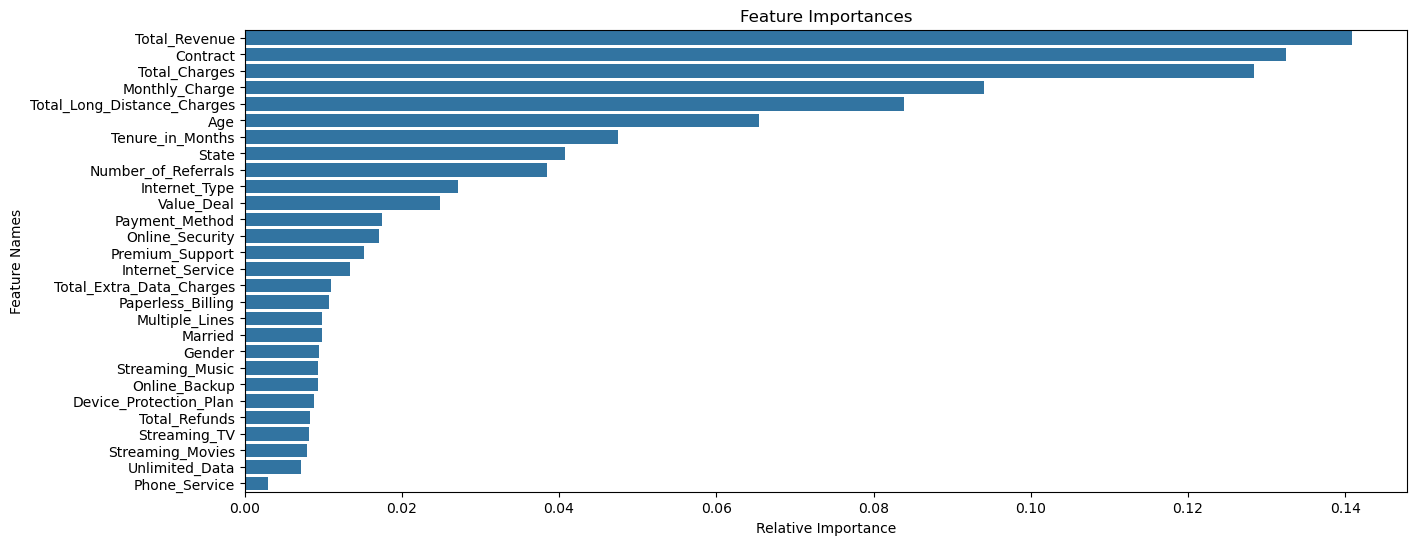

In [37]:
# Festure selection using feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=x.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

### Predicting the Model on New Data

In [40]:
file_path = r"C:\Users\Umed\OneDrive\Desktop\DS & ML Projects\Churn Analysis Project\Book1.xlsx"

sheet_name = "vw_JoinData"

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

original_data = new_data.copy()

customer_ids = new_data['Customer_ID']

new_data = new_data.drop(['Customer_ID','Customer_Status' ,'Churn_Category', 'Churn_Reason'], axis=1)

for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

new_predictions = rf_model.predict(new_data)

original_data['Customer_Status_Predicted'] = new_predictions

original_data = original_data[original_data['Customer_Status_Predicted']==1]

original_data.to_csv(r"C:\Users\Umed\OneDrive\Desktop\DS & ML Projects\Churn Analysis Project\predicted.csv")